This equation describes all points $(x_1, x_2)$ in the feature space that lie on the decision boundary. For these points, the following holds:

$$
\theta \cdot x = 0
$$

In the above equation, $\theta = (\theta_0, \theta_1, \theta_2)$, and $x = (1, x_1, x_2)$. Notice I add a dimension to the $x$ vector to make $\theta$ and $x$ compatible for the scalar product $\cdot$. Hence:

$$
\theta \cdot x = (\theta_0, \theta_1, \theta_2) \cdot (1, x_1, x_2) = 0
$$

If we develop the above expression, we get:
$$
(\theta_0, \theta_1, \theta_2) \cdot (1, x_1, x_2) = \theta_0 \times 1 + \theta_1 \times x_1 + \theta_2 \times x_2 = 0
$$

Then, by isolating $x_2$, we get the expression in the slides:

$$
x_2 = -\frac{\theta_1}{\theta_2}x_1 -\frac{\theta_0}{\theta_2}
$$

If we make $a = -\frac{\theta_1}{\theta_2}$ and $b = -\frac{\theta_0}{\theta_2}$:

$$
x_2 = ax_1 + b
$$

The above is the equation of a line (that is, the decision boundary in logistic regression) that separates the positive from the negative examples. See also the green line in the schematic picture at page 40.



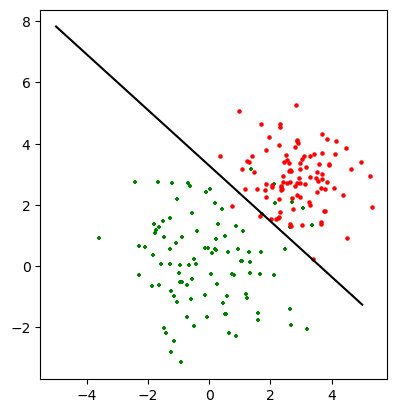

In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([3,3])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T

fig = plt.figure()

plt.scatter(x1_samples[:,0],x1_samples[:,1], c='green', marker='+', s=5)
plt.scatter(x2_samples[:,0],x2_samples[:,1], c='red', marker='o', s=5)

X = np.concatenate((x1_samples,x2_samples), axis = 0)
Y = np.array([0]*100 + [1]*100)

clf = LogisticRegression(random_state=0)
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
b = -(clf.intercept_[0]) / w[1]
x1 = np.linspace(-5, 5)
x2 = a * x1 + b

plt.plot(x1, x2, 'k-')

# Set aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [5]:
clf.intercept_, clf.coef_

(array([-5.45968835]), array([[1.50829144, 1.66064828]]))

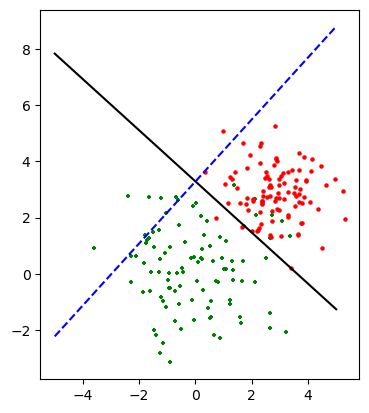

In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

mu_vec1 = np.array([0, 0])
cov_mat1 = np.array([[2, 0], [0, 2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1, 2).T  # to 1-col vector

mu_vec2 = np.array([3, 3])
cov_mat2 = np.array([[1, 0], [0, 1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1, 2).T

fig = plt.figure()

plt.scatter(x1_samples[:, 0], x1_samples[:, 1], c='green', marker='+', s=5)
plt.scatter(x2_samples[:, 0], x2_samples[:, 1], c='red', marker='o', s=5)

X = np.concatenate((x1_samples, x2_samples), axis=0)
Y = np.array([0] * 100 + [1] * 100)

clf = LogisticRegression(random_state=0)
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
b = -(clf.intercept_[0]) / w[1]
x1 = np.linspace(-5, 5)
x2 = a * x1 + b

# Plot the separation line
plt.plot(x1, x2, 'k-')

# Find the slope of the perpendicular line
perpendicular_slope = -1 / a

# Choose a point on the separation line (for example, the midpoint of the line)
midpoint_x1 = (np.min(x1) + np.max(x1)) / 2
midpoint_x2 = (np.min(x2) + np.max(x2)) / 2

# Plot the perpendicular line passing through the midpoint
yy_perpendicular = perpendicular_slope * (x1 - midpoint_x1) + midpoint_x2
plt.plot(x1, yy_perpendicular, 'b--')

# Set aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()
